___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 23486 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model.***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


In [ ]:
# ||
# Before we get going, we should have plan our steps (s. below)
# Questions we should ask ourselves
# What kind of problem (classifiction, regression,..) => what algorithms are useful? Do some research how others have solved the problem. If always the usual suspects (=algorithm) turns up, use these
# What is the goal and what are the metrics we should focus on to reach that goal?
# Data size?
# Priorities: High performance (good metrics), speed, cost?
# Data set imbalanced ?
# Classification: which class should be our target class?
# ||

# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- | ML ALGORITHMS:
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- | DL ALGORITHMS: (we pck GRU)
- short term memory: Word2Vec (CBOW, SkipGram), ELMo, GloVe, FastText
- long term memory: GRU, LSTM
- | TRANSFORMER ALGORITHM:
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting, Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

Data wrangling typically involves pre-processing steps such as data collection, cleaning, and organizing. The goal during this process is to transform the data into a usable and meaningful form for subsequent stages.

In [ ]:
# | Although we won't use the feature later in the analysis, it will still help us to get rid of some contradictions in the EDA phase:

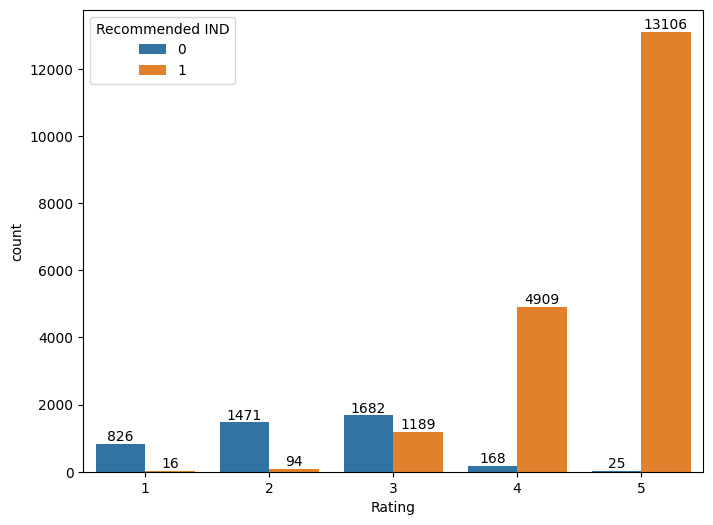

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
# Possible problems:
# | Outliers: 16 people who rated product with 1 also recommended it. Contradiction
# Even if some products where rated with 1, they can still be good - not problem here, since we are doing a sentiment analysis

In [ ]:
df["Recommended IND"].unique()

array([1, 0])

In [ ]:
len(df)

23486

In [ ]:
len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)])

16

In [ ]:
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])

23470

In [ ]:
# | we clean up: all observations where people recommended the article and rated it <4 will be dropped
#                all observations where people did NOT recommended the article and rated it > 4 will be dropped
# Python has a very comfortable way of doing this with ~

In [ ]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

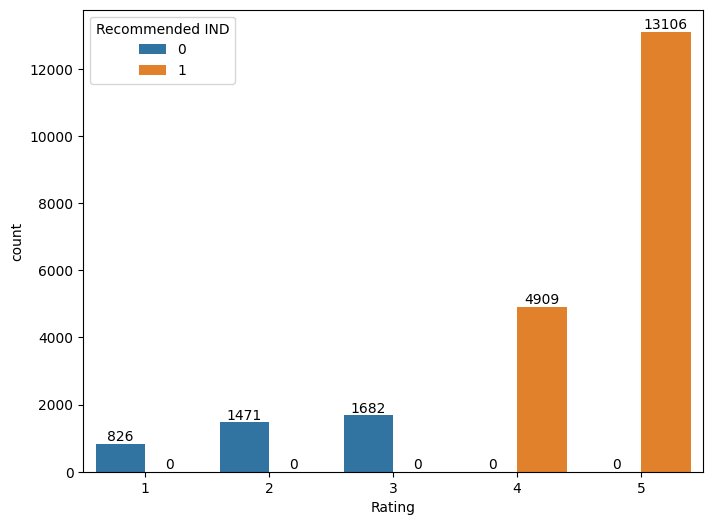

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)

In [ ]:
# Result: not recommended for rating 1,2 and 3, recommended for 4 and 5

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

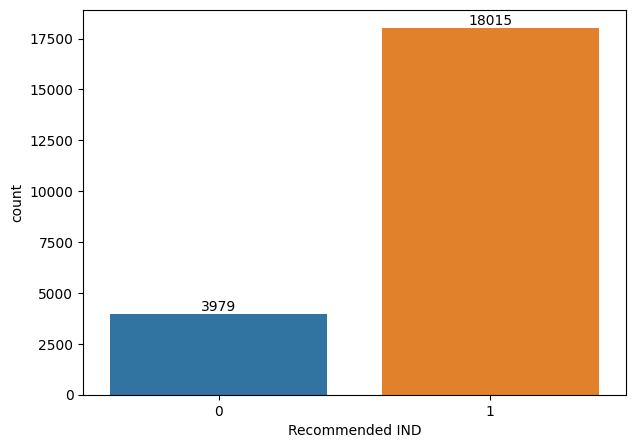

In [ ]:
plt.fig = plt.figure(figsize = (7,5))
ax = sns.countplot(x="Recommended IND",
                   data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"},
          inplace=True)

In [ ]:
# We rename conventionally (text, label)

In [ ]:
df.head()

,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [ ]:
df.isnull().sum()

text     819
label      0
dtype: int64

In [ ]:
df.dropna(inplace = True)
df.reset_index(drop=True,
               inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


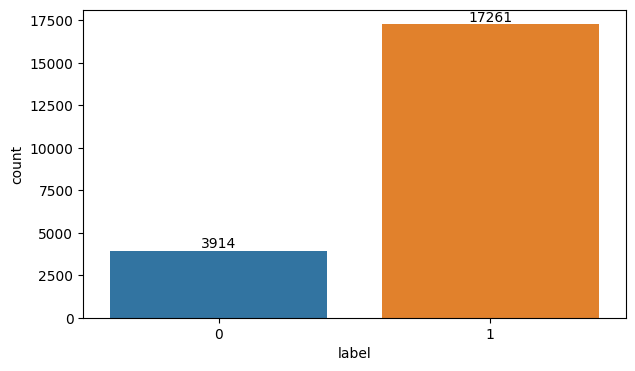

In [ ]:
plt.fig = plt.figure(figsize = (7,4))
ax = sns.countplot(x="label",
                   data=df)
ax.bar_label(ax.containers[0]);

In [ ]:
# | It's important to check early on, if the data set is balanced or not.
# | Usually we are interested in the minority class, i.e. minority class = target class, and usually our target is class 1. Here, it's not. We'll swap classes later

---
---


In [ ]:
## || Now the NLP Part!!

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



In [ ]:
# We can't rely on blissfully trusting the stopwords. We must consider each situation individually and decide to keep or drop stop words
# | Here we are doing sentiment analysis, therefore we HAVE TO bring "NO" and "NOT" into the game (s. below)
# | We might as well let the day unfold and come back later to change the stopwords, e.g. when we find out that in the word cloud there are
# a few not so desirable words

### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [ ]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

||You are expected to create separate word clouds for positive and negative reviews/recommendations. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
positive_sentences = df[df["label"] == 1]["text"] # | positive_sentences: here we collect all observations with a recommendation for our POSITIVE WORD CLOUD
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 17261, dtype: object

In [ ]:
negative_sentences = df[df["label"] == 0]["text"]    # | negative_sentences: here we collect all observations with NO recommendation for our NEGATIVE WORD CLOUD
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun donset want pair...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [ ]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [ ]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud_positive = WordCloud(background_color="black",
                               max_words =250,
                               scale=3)

In [ ]:
wordcloud_positive.generate(positive_words)  # | Here the magic happens

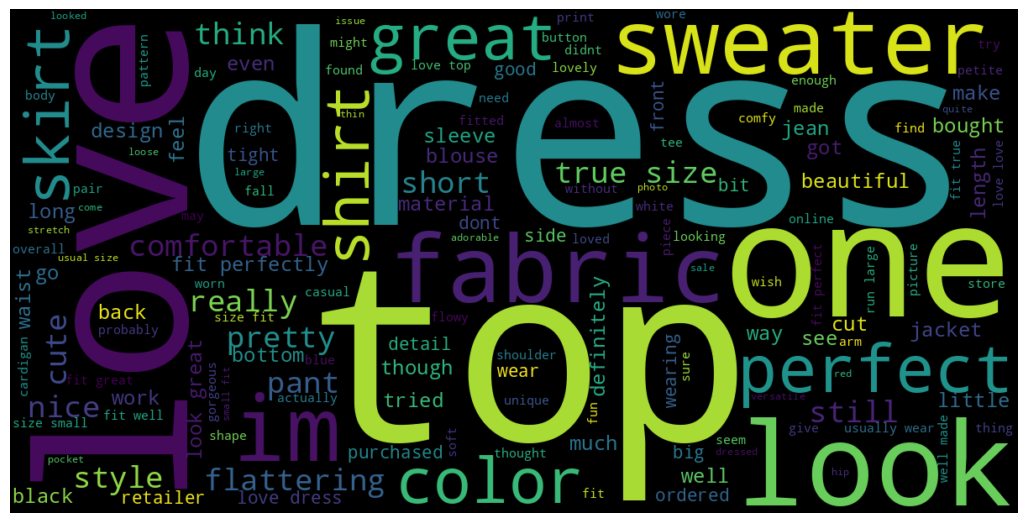

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive,
           interpolation="bilinear")
plt.axis("off")
plt.show()

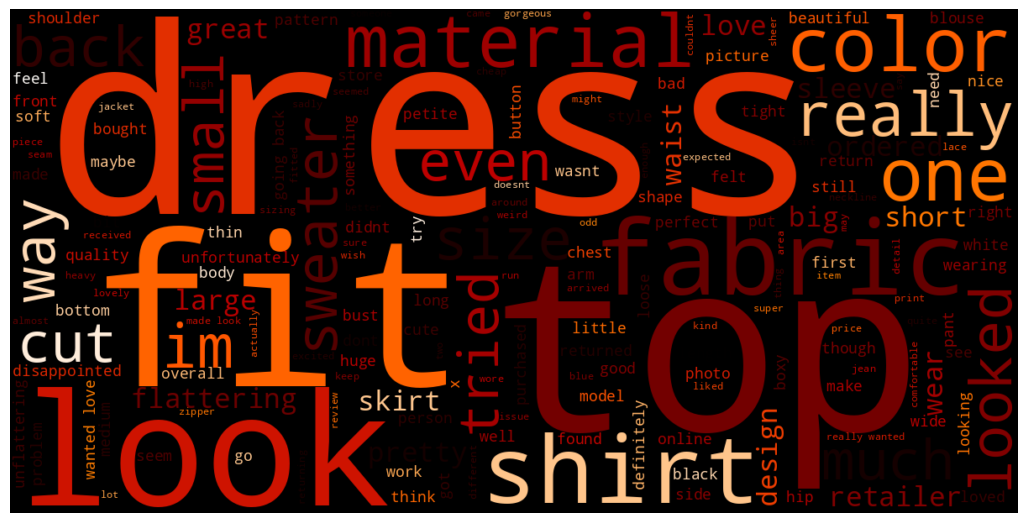

In [ ]:
wordcloud_negative = WordCloud(background_color="black",
                               max_words=250,
                               colormap='gist_heat',
                               scale=3)

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative,
           interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**
**For BERT model, use TF tensor.**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting,
- Deep Learning Model,
- BERT Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values # | as mentioned before, our target class should be class 1, so we swap classes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,   # |  training and test sets to have the same distribution, nothing to do with imbalanced data sets!
                                                    random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
# | The classical steps to the CountVector (and analogously later for the TFIDF vector)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning,
                             min_df=3,  # all words with occurance < 3 out
                             max_df=0.90)  # | we kick out the 10%-most frequent words
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())
# | This is our CountVector:

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning,
                                    min_df=3,
                                    max_df=0.90)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(),
             columns = tf_idf_vectorizer.get_feature_names_out())
# | This is our TF-IDF-Vector:

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Eval functions

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [ ]:
# | our traditional eval-function to check for over- and underfitting
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Using Different Models for our Sentiment Analysis -
## (for each model, we apply the same steps) |

## | We don't optimize hyperparameters this time:
## | Here our focus here lies on model comparison

## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.01,
                         max_iter=1000,
                         class_weight= "balanced",
                         random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1484  243]
 [  52  339]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.58      0.87      0.70       391

    accuracy                           0.86      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.90      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.63      0.90      0.74      3523

    accuracy                           0.88     19057
   macro avg       0.80      0.89      0.83     19057
weighted avg       0.91      0.88      0.89     19057



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01,
                           max_iter=1000,
                           class_weight= "balanced",
                           random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.873906
train_accuracy     0.884131
test_f1            0.719061
train_f1           0.741943
test_recall        0.872542
train_recall       0.901000
test_precision     0.611845
train_precision    0.630623
dtype: float64

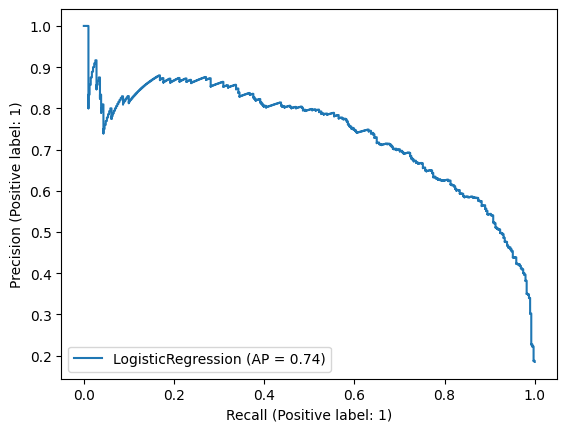

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log,
                                      X_test_count,
                                      y_test);

# PrecisionRecallDisplay.from_prediction(y_test, y_pred);

In [ ]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
log = LogisticRegression(C=0.06,
                         max_iter=1000,
                         random_state=101,
                         class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1464  263]
 [  49  342]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1727
           1       0.57      0.87      0.69       391

    accuracy                           0.85      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.89      0.85      0.86      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     15534
           1       0.61      0.90      0.73      3523

    accuracy                           0.88     19057
   macro avg       0.79      0.89      0.82     19057
weighted avg       0.91      0.88      0.88     19057



In [ ]:
model = LogisticRegression(C=0.06,
                           max_iter=1000,
                           random_state=101,
                           class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.867084
train_accuracy     0.875158
test_f1            0.710168
train_f1           0.728379
test_recall        0.880782
train_recall       0.905447
test_precision     0.595173
train_precision    0.609239
dtype: float64

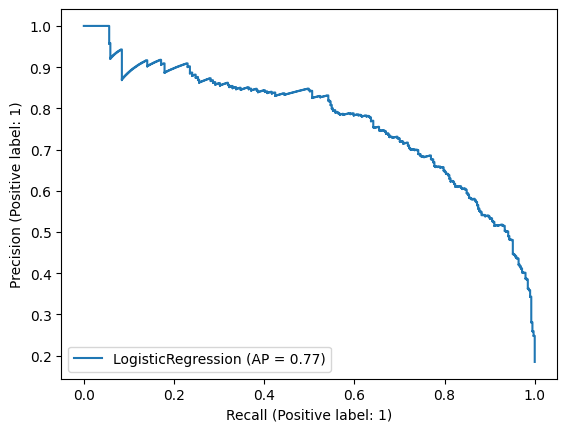

In [ ]:
PrecisionRecallDisplay.from_estimator(log,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [ ]:
# | Regardless of CountVector or TF-IDF, we apply to both the same model name, the difference is only the data in model.fit(X_train_count,) or model.fit(X_train_tf_idf,)
# The only exeption is Naive Bayes:
# MultinomialNB(alpha=1.5) for CountVector
# BernoulliNB(alpha=0.7) for TF-IDF

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [ ]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1609  118]
 [  78  313]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1727
           1       0.73      0.80      0.76       391

    accuracy                           0.91      2118
   macro avg       0.84      0.87      0.85      2118
weighted avg       0.91      0.91      0.91      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.76      0.84      0.80      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.89      0.87     19057
weighted avg       0.93      0.92      0.92     19057



In [ ]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.906439
train_accuracy     0.922577
test_f1            0.757743
train_f1           0.799851
test_recall        0.791652
train_recall       0.836818
test_precision     0.726964
train_precision    0.766018
dtype: float64

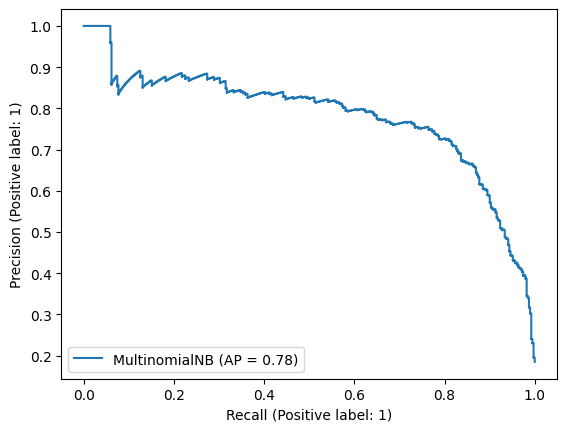

In [ ]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1599  128]
 [  77  314]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1727
           1       0.71      0.80      0.75       391

    accuracy                           0.90      2118
   macro avg       0.83      0.86      0.85      2118
weighted avg       0.91      0.90      0.91      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.75      0.84      0.79      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.89      0.87     19057
weighted avg       0.92      0.92      0.92     19057



In [ ]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy      0.900876
train_accuracy     0.918933
test_f1            0.746102
train_f1           0.792657
test_recall        0.787679
train_recall       0.838206
test_precision     0.708829
train_precision    0.751806
dtype: float64

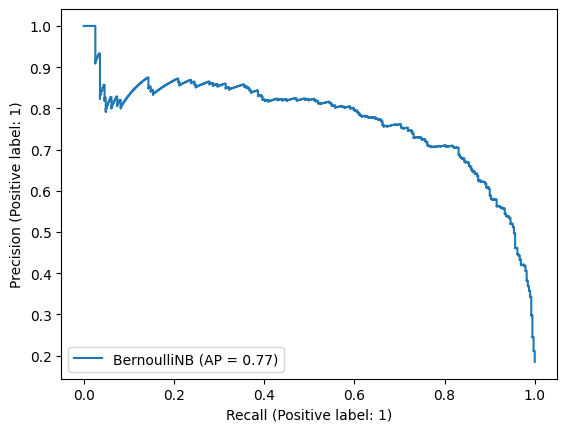

In [ ]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001,
                class_weight="balanced",
                random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1484  243]
 [  53  338]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.58      0.86      0.70       391

    accuracy                           0.86      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.89      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.64      0.90      0.75      3523

    accuracy                           0.89     19057
   macro avg       0.81      0.89      0.84     19057
weighted avg       0.91      0.89      0.89     19057



In [ ]:
model = LinearSVC(C=0.001,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.874902
train_accuracy     0.885612
test_f1            0.720888
train_f1           0.745156
test_recall        0.873676
train_recall       0.904595
test_precision     0.613916
train_precision    0.633506
dtype: float64

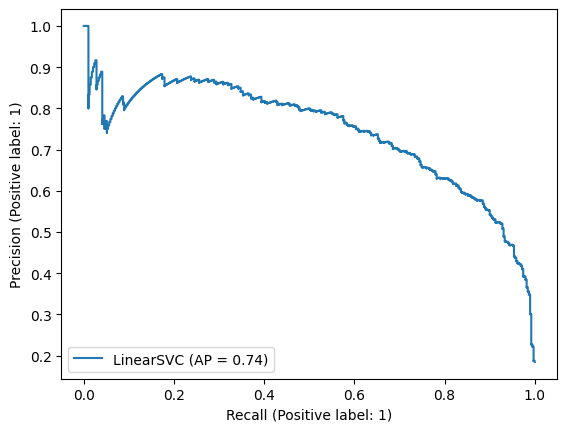

In [ ]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [ ]:
svc = LinearSVC(C=0.03,
                class_weight="balanced",
                random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1496  231]
 [  40  351]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1727
           1       0.60      0.90      0.72       391

    accuracy                           0.87      2118
   macro avg       0.79      0.88      0.82      2118
weighted avg       0.91      0.87      0.88      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     15534
           1       0.66      0.93      0.77      3523

    accuracy                           0.90     19057
   macro avg       0.82      0.91      0.85     19057
weighted avg       0.92      0.90      0.91     19057



In [ ]:
model = LinearSVC(C=0.03,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883666
train_accuracy     0.899022
test_f1            0.738228
train_f1           0.773624
test_recall        0.886735
train_recall       0.933327
test_precision     0.632754
train_precision    0.660593
dtype: float64

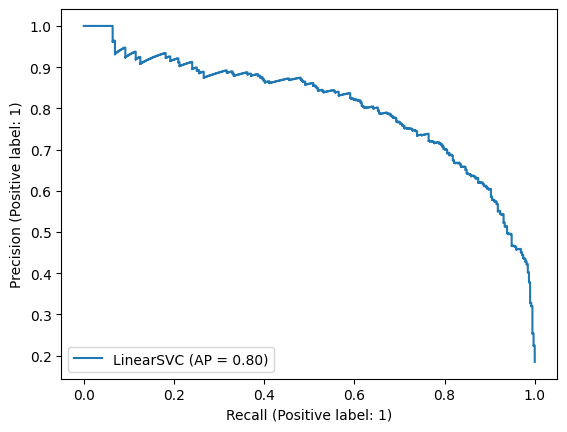

In [ ]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1458  269]
 [  61  330]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1727
           1       0.55      0.84      0.67       391

    accuracy                           0.84      2118
   macro avg       0.76      0.84      0.78      2118
weighted avg       0.88      0.84      0.86      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     15534
           1       0.60      0.88      0.71      3523

    accuracy                           0.87     19057
   macro avg       0.78      0.87      0.81     19057
weighted avg       0.90      0.87      0.88     19057



In [ ]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.853755
train_accuracy     0.870453
test_f1            0.676497
train_f1           0.712555
test_recall        0.826562
train_recall       0.868105
test_precision     0.572841
train_precision    0.604452
dtype: float64

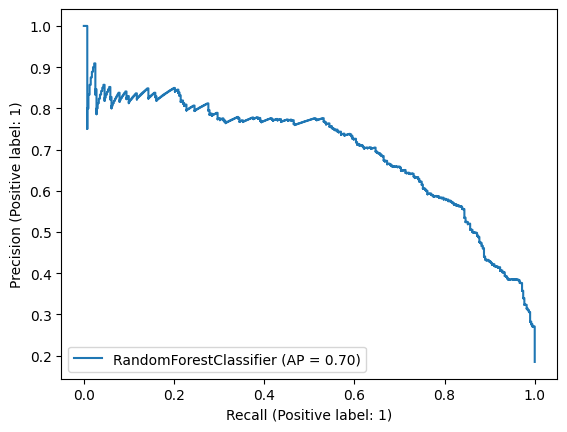

In [ ]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1433  294]
 [  64  327]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1727
           1       0.53      0.84      0.65       391

    accuracy                           0.83      2118
   macro avg       0.74      0.83      0.77      2118
weighted avg       0.88      0.83      0.84      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15534
           1       0.58      0.89      0.70      3523

    accuracy                           0.86     19057
   macro avg       0.78      0.87      0.81     19057
weighted avg       0.90      0.86      0.87     19057



In [ ]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.842001
train_accuracy     0.866249
test_f1            0.658908
train_f1           0.709904
test_recall        0.824863
train_recall       0.884883
test_precision     0.548820
train_precision    0.592852
dtype: float64

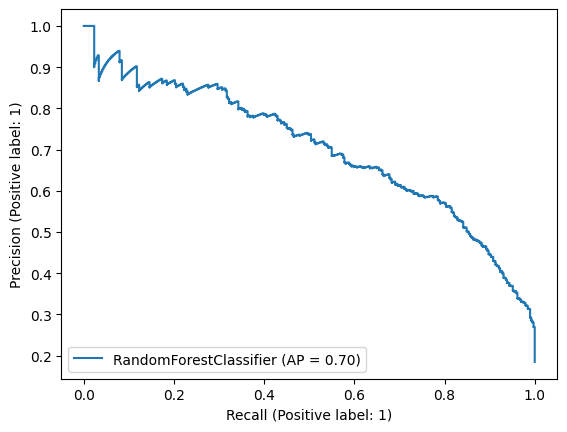

In [ ]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1638   89]
 [ 168  223]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1727
           1       0.71      0.57      0.63       391

    accuracy                           0.88      2118
   macro avg       0.81      0.76      0.78      2118
weighted avg       0.87      0.88      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     15534
           1       0.77      0.61      0.68      3523

    accuracy                           0.89     19057
   macro avg       0.84      0.78      0.81     19057
weighted avg       0.89      0.89      0.89     19057



In [ ]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.889175
train_accuracy     0.894008
test_f1            0.663536
train_f1           0.678427
test_recall        0.591257
train_recall       0.604820
test_precision     0.756811
train_precision    0.772458
dtype: float64

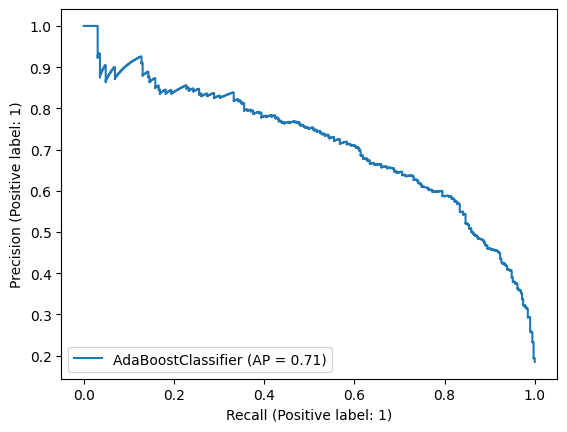

In [ ]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42,
                         learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1663   64]
 [ 192  199]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1727
           1       0.76      0.51      0.61       391

    accuracy                           0.88      2118
   macro avg       0.83      0.74      0.77      2118
weighted avg       0.87      0.88      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     15534
           1       0.80      0.54      0.65      3523

    accuracy                           0.89     19057
   macro avg       0.85      0.75      0.79     19057
weighted avg       0.88      0.89      0.88     19057



In [ ]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42,
                           learning_rate=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.886237
train_accuracy     0.894119
test_f1            0.632009
train_f1           0.658291
test_recall        0.529100
train_recall       0.551676
test_precision     0.786290
train_precision    0.816012
dtype: float64

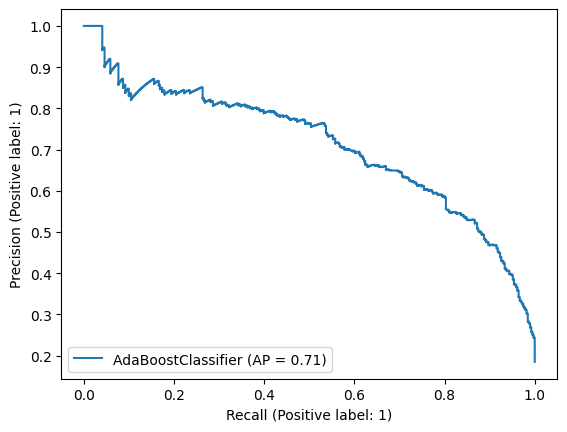

In [ ]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout # | we pick GRU to represent DL modeling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "I was very happy to snag this dress at such a great price! it's very easy to slip on an

### Tokenization

In [ ]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [ ]:
len(tokenizer.word_index) # DL models are more roubt towards stop wordss than ML?

14389

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X) #

### Maximum number of tokens for all documents¶

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens] #  in CNN oyu should provide the shape, all iinputs with the smae lenght, same here!
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens.mean()

60.2330106257379

In [ ]:
num_tokens.max()

116

In [ ]:
max_tokens = 116  # not the best idea, since we will have a lot of 0s,

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)  # if the max_number is an outlier, we weill have a lot of 0s in our data
# 116  # not the best idea, since we will have a lot of 0s, we don't need 100%, we could do it with 95%

1.0

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens,
                      maxlen = max_tokens)

In [ ]:
X_pad.shape

(21175, 116)

### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

### Modeling

In [ ]:
model = Sequential()  # RNN modele?

In [ ]:
embedding_size = 50

In [ ]:
# || model.add(Embedding, Dropout, GRU, Dropout, GRU, ....Dense), # see notebook NLP 4
model.add(Embedding(input_dim=num_words,          # one vector for eacht token, each token will be respresented by an embedding vector, see 3 dim of embedding layer
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.001)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])  # recall our most ipm metric, in the trainig phase, we will see loss and recall

In [ ]:
model.summary()

# embedding_size * num_words ==> 50 * 15001 = 750050

# 3 x (n2 + nm + 2n) m= input, n= output
# (50*50 + 50*50 + 2*50)*3 = 15.300 ==> m = 50, n = 50
# (25*25 + 50*25 + 2*25)*3 = 5775   ==> m = 50, n = 25
# (12*12 + 25*12 + 2*12)*3 = 1404   ==> m = 24, n = 12
# 12*1 + 1 = 13

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [ ]:
# | Question: How can you change the number of parameters? dropout, number of neurons, increase number of embeddings, more parameters mean more costly

In [ ]:
          from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2,
                           restore_best_weights=True)


## when you see overfitting after 10 epochs, and you have set epoch = 20, then reduce it, (early stopping e.g.)
# you might play around with patence as well

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61339642, 2.70465512])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])  # difference betwe validation data and validation split???

Epoch 1/10
149/149 [==============================] - 31s 157ms/step - loss: 0.4632 - recall: 0.7550 - val_loss: 0.2889 - val_recall: 0.8824
Epoch 2/10
149/149 [==============================] - 21s 140ms/step - loss: 0.2520 - recall: 0.9228 - val_loss: 0.2776 - val_recall: 0.8645
Epoch 3/10
149/149 [==============================] - 21s 139ms/step - loss: 0.1913 - recall: 0.9478 - val_loss: 0.2620 - val_recall: 0.8261
Epoch 3: early stopping


### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.463157,0.755038,0.288853,0.882353
1,0.252027,0.922793,0.277587,0.864450
2,0.191283,0.947772,0.262004,0.826087


<Axes: >

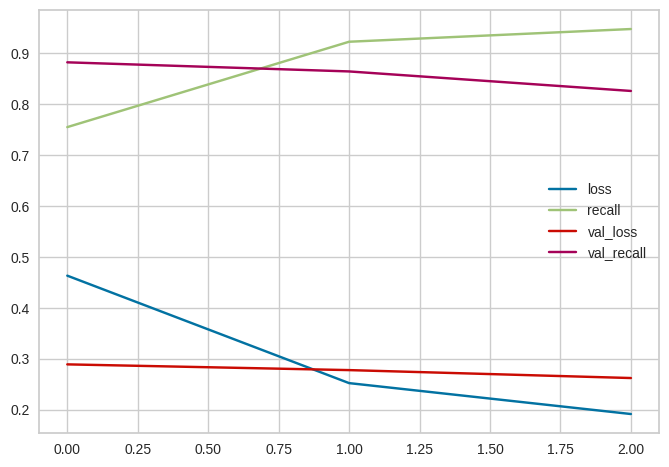

In [ ]:
model_loss.plot()

In [ ]:
# | Watch how the model behaves, then adapt the parameters, e.g. we don't have better results in validation after 1, then we can decrease patience

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score # not really nexessary (trainging data set)

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 3s 23ms/step
[[1506  221]
 [  46  345]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1727
           1       0.61      0.88      0.72       391

    accuracy                           0.87      2118
   macro avg       0.79      0.88      0.82      2118
weighted avg       0.90      0.87      0.88      2118



In [ ]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 11s 19ms/step
[[13964  1570]
 [  253  3270]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     15534
           1       0.68      0.93      0.78      3523

    accuracy                           0.90     19057
   macro avg       0.83      0.91      0.86     19057
weighted avg       0.93      0.90      0.91     19057



67/67 [==============================] - 1s 19ms/step


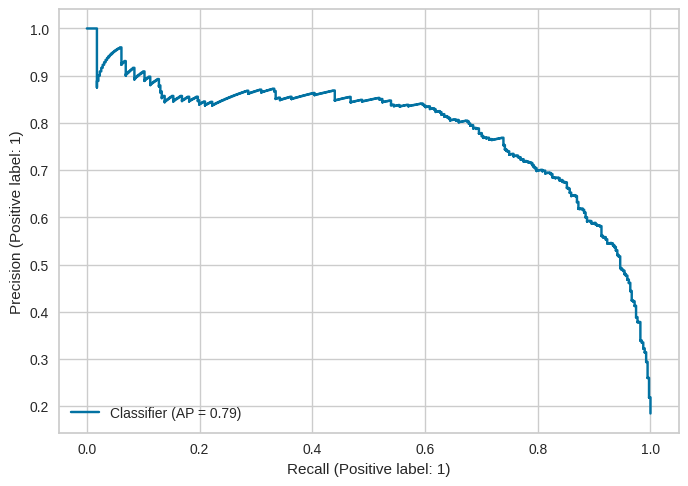

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


In [ ]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.788823236288221

In [ ]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

In [ ]:
# After 2018 we have better results with LLMs,
# a-few shot learning, or also called in-context learning
# with LLM, you can do different (general, multiple) taks, but you can still fine-tune it

## BERT Modeling

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.5 MB/s eta 0:00:00


### Tokenization

In [ ]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "I was very happy to snag this dress at such a great price! it's very easy to slip on an

In [ ]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # we uses uncased, since in our case, upper and lower case are not important, we don't want ot generate 2 different tokens because of lower and uppercase

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)  # e.g.[CLS]` and `[SEP]`, therefore we incerease the length by a few tokens
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  162


In [ ]:
np.array(num_of_sent_tokens).mean()

76.31556080283353

In [ ]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens) # 100%,

1.0

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

In [ ]:
all_sentence_tokens = tokenizer(list(X),  # 21H 23
                                max_length=162,
                                truncation=True,  # not really necesary, since our max is 162 anyway, so we | cannot truncate
                                padding='max_length',
                                add_special_tokens=True)

In [ ]:
np.array(all_sentence_tokens['input_ids']) #

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2001, ...,    0,    0,    0],
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [ ]:
# we don't noeed segment embedding here, since for 1 input we have only 1 sentence

In [ ]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
def transformation(X):  # we still have to customize this function, even if it looks similar any any application
  # set array dimensions
  seq_len = 162  # we chose that number above

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [ ]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [ ]:
Xids_train

array([[ 101, 2025, 2469, ...,    0,    0,    0],
       [ 101, 3504, 2428, ...,    0,    0,    0],
       [ 101, 2023, 2003, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2293, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 1996, 6302, ...,    0,    0,    0]])

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)


Xids_train.shape  : (19057, 162)
Xmask_train.shape : (19057, 162)
Xids_test.shape   : (2118, 162)
Xmask_test.shape  : (2118, 162)


In [ ]:
labels_train = y_train2.reshape(-1,1) # | The -1 is a special value that means "whatever is needed", so it automatically computes the correct number of rows
labels_train                          # | that is necessary to maintain the number of elements in the array.

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensorflow Tensor

In [ ]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [ ]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
dataset_train # now ready to be used for tensor

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test # now ready to be used for tensor

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

## Batch Size

In [ ]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 12.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 29.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are instal

In [ ]:
from official.nlp import optimization
epochs = 2 # usually 2,3 or 4 recommended
#batch_size = 32 # recommended
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)  # warmup steps, step by step it will reach 2e-5 recommended

init_lr = 2e-5  # 3e-5, 5e-5 recommended
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')
# | Note: go with the recommendations, unless you have a good reason not to

In [ ]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1192
119


### Creating Model with TPU

In [ ]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]  # |
    # we are usng the funcitonal APi, nnotht esequential API

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x) # end of model structure, output layer = 1, binary classification

    return Model(inputs=[input_ids, attention_mask], outputs=y) # our fine-tuned model

In [ ]:
with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [ ]:
# we were creative from dense_1 on (=Finetuning!!!), but above, we don't train the 109482240 parameters from the BERT model.
# we should not fine-tune too much.

In [ ]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/2
596/596 [==============================] - 242s 202ms/step - loss: 0.5538 - recall: 0.8445 - val_loss: 0.4709 - val_recall: 0.9028
Epoch 2/2
596/596 [==============================] - 63s 106ms/step - loss: 0.4421 - recall: 0.9097 - val_loss: 0.3813 - val_recall: 0.8824


## Model evaluation

In [ ]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.553777,0.844451,0.470890,0.902813
1,0.442076,0.909736,0.381258,0.882353


<Axes: >

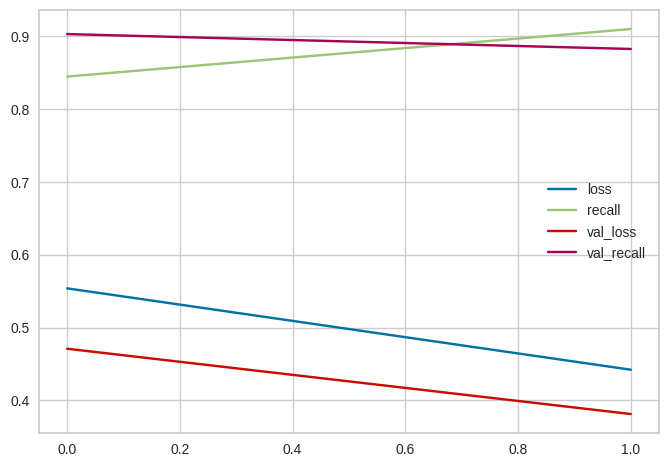

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

67/67 [==============================] - 16s 164ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1727
           1       0.81      0.88      0.84       391

    accuracy                           0.94      2118
   macro avg       0.89      0.92      0.90      2118
weighted avg       0.94      0.94      0.94      2118



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

596/596 [==============================] - 22s 35ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     15534
           1       0.89      0.92      0.91      3523

    accuracy                           0.97     19057
   macro avg       0.94      0.95      0.94     19057
weighted avg       0.97      0.97      0.97     19057



67/67 [==============================] - 3s 27ms/step


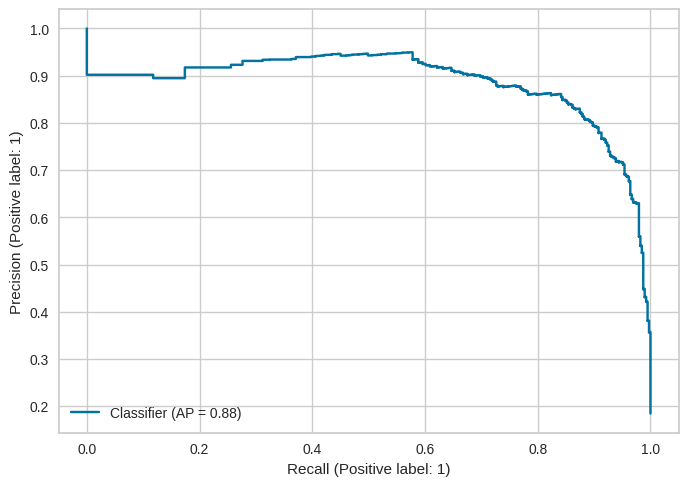

In [ ]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
average_precision_score(y_test2, y_pred_proba)

0.8842455381453453

In [ ]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

## BERT Model with Weighted

In [ ]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  optimizer = optimizer #Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  precision = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
pd.Series(y).value_counts(normalize=True)

0    0.815159
1    0.184841
dtype: float64

In [ ]:
# 1 is target class, witht he follwing weights, we are balancing to 1:1

In [ ]:
weights = {0:0.18, 1:0.81}

In [ ]:
model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights)

Epoch 1/2
596/596 [==============================] - 204s 200ms/step - loss: 0.1264 - recall_1: 0.8958 - val_loss: 0.3331 - val_recall_1: 0.9335
Epoch 2/2
596/596 [==============================] - 63s 106ms/step - loss: 0.0933 - recall_1: 0.9466 - val_loss: 0.3692 - val_recall_1: 0.9361


In [ ]:
y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test2, y_pred))

67/67 [==============================] - 16s 164ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1727
           1       0.75      0.94      0.83       391

    accuracy                           0.93      2118
   macro avg       0.87      0.93      0.89      2118
weighted avg       0.94      0.93      0.93      2118



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train2, y_train_pred))

596/596 [==============================] - 23s 35ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     15534
           1       0.82      0.97      0.89      3523

    accuracy                           0.96     19057
   macro avg       0.91      0.96      0.93     19057
weighted avg       0.96      0.96      0.96     19057



In [ ]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test2, y_pred_proba)

67/67 [==============================] - 3s 27ms/step


0.9108050339701093

In [ ]:
# now (after weighing) we have better results

In [ ]:
BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

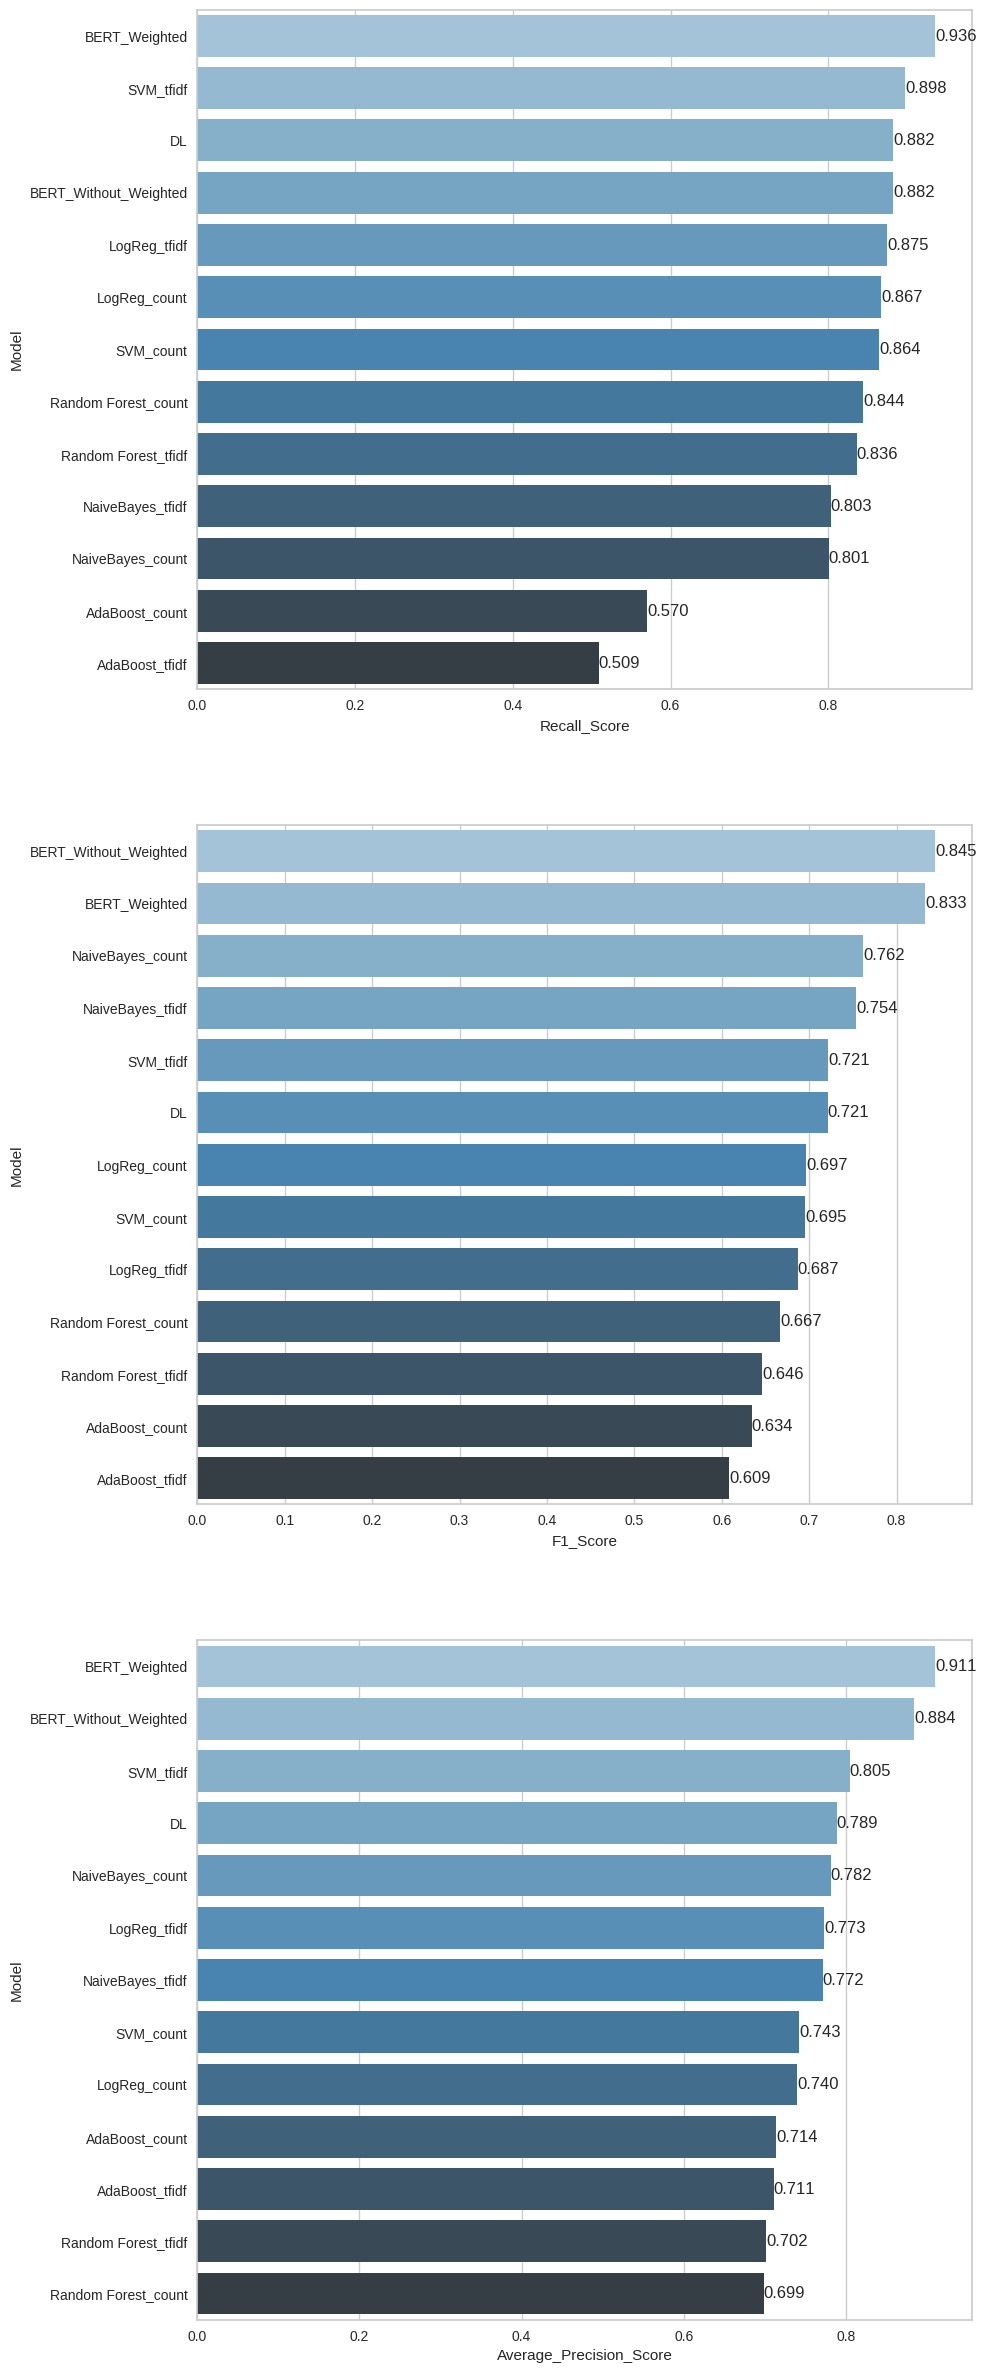

In [ ]:
#b| all tis to prepare the comparison table
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1,
                                     BERT_without_weighted_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec,
                                         BERT_without_weighted_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP,
                                                    BERT_without_weighted_AP]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

# WEighted matters in the case of BERT

# with less expensive models (=SVM-tdidf) you can have good results

In [ ]:
# clear winner: BERT
# if we had similar results, the we coudl prefer other, simpler models, but here the difference is far too big to question BERT

## BERT Large Uncased

In [ ]:
#from transformers import AutoTokenizer
#tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")

#from transformers import TFAutoModel
#model = TFAutoModel.from_pretrained("bert-large-uncased")

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___